In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math,copy


In [5]:
X=np.array([1,2,3])
y=np.array([10,15,30])

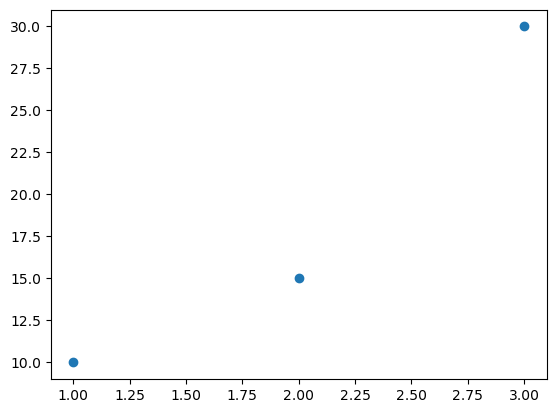

In [6]:
plt.scatter(X,y)

In [8]:
w=20
b=4

[14. 24. 34.]


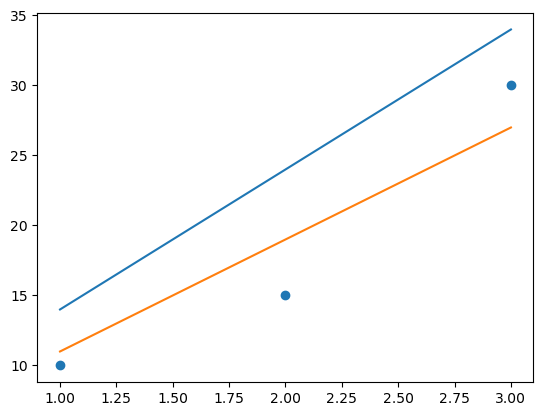

In [17]:
def calc(X,w,b):
    m=X.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
       f_wb[i]=w*X[i]+b
    return f_wb
tmp=calc(X,10,4)
tmp1=calc(X,8,3)
print(tmp)
plt.scatter(X,y)
plt.plot(X,tmp)
plt.plot(X,tmp1)

In [26]:
 def costs(X, y, w, b):
    total_cost = 0
    m = len(y) 

    for i in range(m):
        f_wb = w * X[i] + b  
        cost = (f_wb - y[i]) ** 2
        total_cost += cost  

    return total_cost / (2 * m)  


In [29]:
l=costs(X,y,10,4)
print(l)

18.833333333333332


In [42]:
def compute_gradient(X, y, w, b): 

    m = X.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * X[i] + b 
        dj_dw_i = (f_wb - y[i]) * X[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db=dj_db/m
    return dj_dw,dj_db



In [43]:
print(compute_gradient(X, y, 10, 4)) 


(11.333333333333334, 5.666666666666667)


In [49]:
plt_grdients(X,y,cost,compute_gradient)
plt.show()

NameError: name 'plt_grdients' is not defined

In [60]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, costs, gradient_function): 

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(X, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( costs(X, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history,p_history

In [61]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, costs, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")




Iteration    0: Cost 1.83e+02  dj_dw: -4.333e+01, dj_db: -1.833e+01   w:  4.333e-01, b: 1.83333e-01
Iteration 1000: Cost 2.94e+00  dj_dw: -8.072e-02, dj_db:  1.835e-01   w:  9.329e+00, b:-1.41880e-01
Iteration 2000: Cost 2.79e+00  dj_dw: -2.425e-02, dj_db:  5.512e-02   w:  9.799e+00, b:-1.20864e+00
Iteration 3000: Cost 2.78e+00  dj_dw: -7.283e-03, dj_db:  1.656e-02   w:  9.939e+00, b:-1.52908e+00
Iteration 4000: Cost 2.78e+00  dj_dw: -2.188e-03, dj_db:  4.973e-03   w:  9.982e+00, b:-1.62534e+00
Iteration 5000: Cost 2.78e+00  dj_dw: -6.572e-04, dj_db:  1.494e-03   w:  9.995e+00, b:-1.65425e+00
Iteration 6000: Cost 2.78e+00  dj_dw: -1.974e-04, dj_db:  4.488e-04   w:  9.998e+00, b:-1.66294e+00
Iteration 7000: Cost 2.78e+00  dj_dw: -5.930e-05, dj_db:  1.348e-04   w:  1.000e+01, b:-1.66555e+00
Iteration 8000: Cost 2.78e+00  dj_dw: -1.781e-05, dj_db:  4.049e-05   w:  1.000e+01, b:-1.66633e+00
Iteration 9000: Cost 2.78e+00  dj_dw: -5.351e-06, dj_db:  1.216e-05   w:  1.000e+01, b:-1.66657e+00


In [62]:
print(w,b)

20 4
